In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import gsw as gs
from scipy import optimize
from xgcm import Grid
import xarray as xr
import cartopy as cart
import cartopy.crs as ccrs
import cmocean as cmo
import scipy.io as si
import numpy.ma as ma

read in data

In [2]:
tslice1 = 60
tslice2 = 69

path = '/Users/newsom/FAFMIP_VARS/'
files = ['thetao_yr_GFDL-ESM2M_FAF-control_r1i1p1.nc','so_yr_GFDL-ESM2M_FAF-control_r1i1p1.nc']
ds = xr.open_dataset(path + files[0])
da_G = ds['sea_water_potential_temperature'].isel(time=slice(tslice1,tslice2))-273
dss = xr.open_dataset(path + files[1])
das_G = dss['sea_water_salinity'].isel(time=slice(tslice1,tslice2))


Calculate density- could play around with sigma one, two, etc. It might looks better with one or the other. 
If so, you might have to tweak the max_depth argument below?

In [3]:
pd_G = gs.density.sigma1(das_G.mean('time'), da_G.mean('time')) #here sig one

define functions

In [4]:
optimize.curve_fit

def exp_func(depth,A,B,L):
    return A + B * np.exp(-depth/L)

def calc_pyc_scale_depth(data,depth_max):
    test = data.sel(depth=slice(depth_max))#.load()
    RR = test.differentiate('depth')
    test = test.where(RR>0)
    depths = xr.zeros_like(test.isel(depth=0))
    for i in range(test['Y'].size):
    print(i)
        for j in range(test['X'].size):
            tmp = test.isel(Y=i,X=j).dropna('depth') #dropping nans might not be necassary for your data, for me I had to or it looked crazy
            if tmp.size > 5: #this value should be small relative to the number of depths/layers. Just make sure there's a few...
                #the line below, you might need to replace tmp['depth'] to whatever value you have for the layer- layer number?
                depths.values[i,j] = optimize.curve_fit(exp_func,tmp['depth'].values,tmp.values,maxfev=5000)[0][-1] #maxfev is number of tries...
    return depths



do calculation

In [1]:
scale_G = calc_pyc_scale_depth(pd_G,3500) #use time mean for now, and there is probably a much smarter way 
#then a big forloop, I was too lazy to figure it out

plot (this is bad code below- was a fast copy paste)!

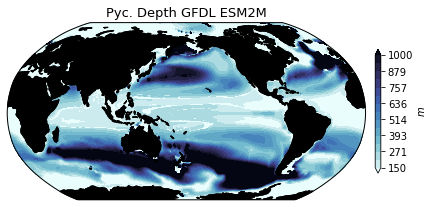

In [7]:
levs=50
import matplotlib.ticker as tick 
kargs = {'shrink':.7,'orientation':'vertical','extend':'both','pad':0.02,"format":tick.FormatStrFormatter('%.0f'),"label":'$m$'}
levs=15
titls = ['Pyc. Depth GFDL ESM2M']
cmm = cmo.cm.ice_r
s1 = 7
s2=3
fnts = 13

fig,axs = plt.subplots(1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(s1,s2))
scale_G.plot.contourf(ax=axs,levels = levs,center=.05,vmin=150,vmax=1000,transform=ccrs.PlateCarree(),cmap=cmm,cbar_kwargs=kargs)
axs.set_title(titls[0],fontsize=fnts)
axs.coastlines()
axs.add_feature(cart.feature.LAND,facecolor='black',zorder=100)
plt.tight_layout()

In [8]:
pwd

'/Users/newsom/PYTHON_envs/Environments/first_env'